In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

import statsmodels.api as sm #decompose data
from statsmodels.tsa.stattools import adfuller # For DF test
from statsmodels.tsa.stattools import grangercausalitytests #For checking the casuality investigation

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from pandas import DataFrame
from pandas import concat

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from numpy import concatenate
from sklearn import metrics # for the evaluation
from sklearn.metrics import mean_squared_error

In [ ]:
'''The dataset is a Time Series Data for Power Consumption, containing the following features: Global Active Power, 
Global Reactive Power, Voltage, Sub Metering 1, Sub Metering 2, Sub Metering 3.

Attribute Information:
1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.globalactivepower: household global minute-averaged active power (in kilowatt)

4.globalreactivepower: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.submetering1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a 
  dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.submetering2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a
  washing-machine, a tumble-drier, a refrigerator and a light.

9.submetering3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an
  air-conditioner.
  
I will try to forecast the Global_active_power. This problem is a multivariate time series and I have used Long Short Term 
Memory(LSTM) model to predict Global_active_power.

This script involves the following steps:
1. Changing the format of datafram.
2. Changing the index od data  using Date and Time.
3. Data exploration.
4. Conver data into numeric data.
5. Visualizing the time seies data for each column in dataset.
6. Visualization plot for day resample.
7. Visualization plot for month resample.
8. Visualization plot for hour resample.
9. Causality Investigation.
10.Seasonality and decompose data.
11.Convert series to supervised learning.
12.Rescale data.
13.Drop columns we don't want to predict.
14.Building the network.
  '''

In [2]:
df=pd.read_csv(r'C:\Users\karimin1\household_power_consumption.txt')

In [3]:
#Convert dataset into csv 

df.to_csv (r'C:\Users\karimin1\household_power_consumption.csv', index=None)

In [4]:
df

,Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0,16/12/2006;17:24:00;4.216;0.418;234.840;18.400...
1,16/12/2006;17:25:00;5.360;0.436;233.630;23.000...
2,16/12/2006;17:26:00;5.374;0.498;233.290;23.000...
3,16/12/2006;17:27:00;5.388;0.502;233.740;23.000...
4,16/12/2006;17:28:00;3.666;0.528;235.680;15.800...
...,...
2075254,26/11/2010;20:58:00;0.946;0.000;240.430;4.000;...
2075255,26/11/2010;20:59:00;0.944;0.000;240.000;4.000;...
2075256,26/11/2010;21:00:00;0.938;0.000;239.820;3.800;...
2075257,26/11/2010;21:01:00;0.934;0.000;239.700;3.800;...


In [5]:
df.columns

Index(['Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3'], dtype='object')

In [6]:
'''All data are represented as a column. In the first step I will seperate data into different columns by split() method from 
pandas library.'''

'All data are represented as a column. In the first step I will seperate data into different columns by split() method from \npandas library.'

In [7]:
columns = df['Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3'].max().split(';')

In [8]:
columns

['9/9/2010',
 '23:59:00',
 '0.382',
 '0.210',
 '243.890',
 '1.800',
 '0.000',
 '1.000',
 '1.000']

In [9]:
new = df['Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3'].str.split(";", expand = True)


In [10]:
new

,0,1,2,3,4,5,6,7,8
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.000
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.000
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.000
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.000


In [11]:
#Rename the columns

new=new.rename(columns={0:'Date',1:'Time',2:'Global_active_power',3:'Global_reactive_power',4:'Voltage',5:'Global_intensity',6:'Sub_metering_1',7:'Sub_metering_2',8:'Sub_metering_3'})

In [12]:
new

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.000
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.000
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.000
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.000


In [13]:
new['DateTime'] = pd.to_datetime(new.pop('Date')) + pd.to_timedelta(new.pop('Time'))

In [14]:
'''I have combined two columns Data and Time together and then I have used them as index for dataset.'''

'I have combined two columns Data and Time together and then I have used them as index for dataset.'

In [15]:
new

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.000,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.000,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.000,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.000,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.000,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.430,4.000,0.000,0.000,0.000,2010-11-26 20:58:00
2075255,0.944,0.000,240.000,4.000,0.000,0.000,0.000,2010-11-26 20:59:00
2075256,0.938,0.000,239.820,3.800,0.000,0.000,0.000,2010-11-26 21:00:00
2075257,0.934,0.000,239.700,3.800,0.000,0.000,0.000,2010-11-26 21:01:00


In [16]:
#Convert the data frame index to a datetime index

new = new.set_index('DateTime')

In [17]:
new

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.000
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.000
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.000


In [170]:
#Data exploration

In [18]:
new.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [19]:
new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Global_active_power    object
 1   Global_reactive_power  object
 2   Voltage                object
 3   Global_intensity       object
 4   Sub_metering_1         object
 5   Sub_metering_2         object
 6   Sub_metering_3         object
dtypes: object(7)
memory usage: 126.7+ MB


In [20]:
'''The type of all data in this dataset is defined as object'''

'The type of all data in this dataset is defined as object'

In [21]:
#Finding missing values
new.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [22]:
'''There are no missing values'''

'There are no missing values'

In [23]:
new.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,4187,533,2838,222,89,82,33
top,?,0.000,?,1.000,0.000,0.000,0.000
freq,25979,481561,25979,172785,1880175,1436830,852092


In [189]:
#new['Global_active_power'] = pd.to_numeric(new['Global_active_power'],errors = 'coerce')

In [24]:
#Conver data into numeric data

col=['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']

for item in col:
    new[item] = pd.to_numeric(new[item],errors = 'coerce')

In [25]:
new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
##Visualizing the time seies data for each column in dataset using the resampling data by month, day and hour respectively

In [26]:
new.resample('M').sum()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-31,41813.282,2889.436,5309773.22,176594.8,27460.0,48712.0,162951.0
2007-01-31,63795.714,5559.936,10714523.25,270547.6,72455.0,66382.0,323102.0
2007-02-28,46563.028,4632.204,9671130.63,197378.8,35733.0,65508.0,232883.0
2007-03-31,55277.564,5127.232,10711059.86,234476.0,58307.0,87919.0,280266.0
2007-04-30,38641.408,4788.536,9421339.38,166258.6,45958.0,53811.0,194004.0
2007-05-31,47374.472,5289.366,10564664.76,204375.8,73135.0,78071.0,234103.0
2007-06-30,38546.790,6009.400,10349711.12,166997.6,54281.0,65786.0,198972.0
2007-07-31,38423.900,5398.634,10548347.67,166977.4,49150.0,71283.0,202955.0
2007-08-31,40544.308,5449.252,10692703.92,174130.6,47951.0,63787.0,230495.0


In [27]:
'''First we can see the ploy of data based on month, and then by day and hour.'''

'First we can see the ploy of data based on month, and then by day and hour.'

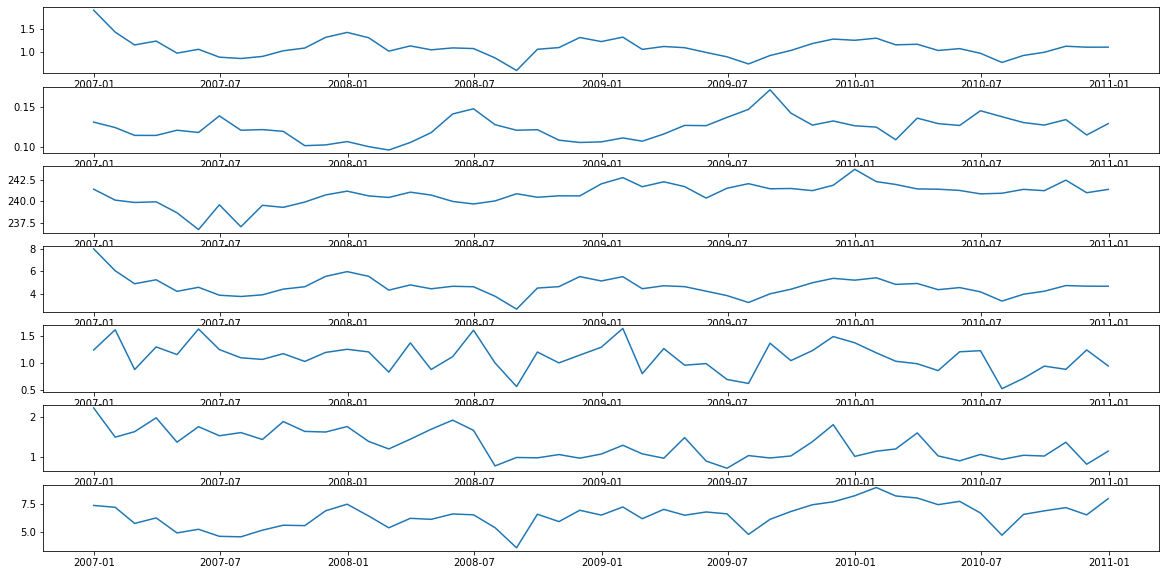

In [28]:

i = 1
cols=['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(new.resample('M').mean()[col])
    #plt.title(new.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

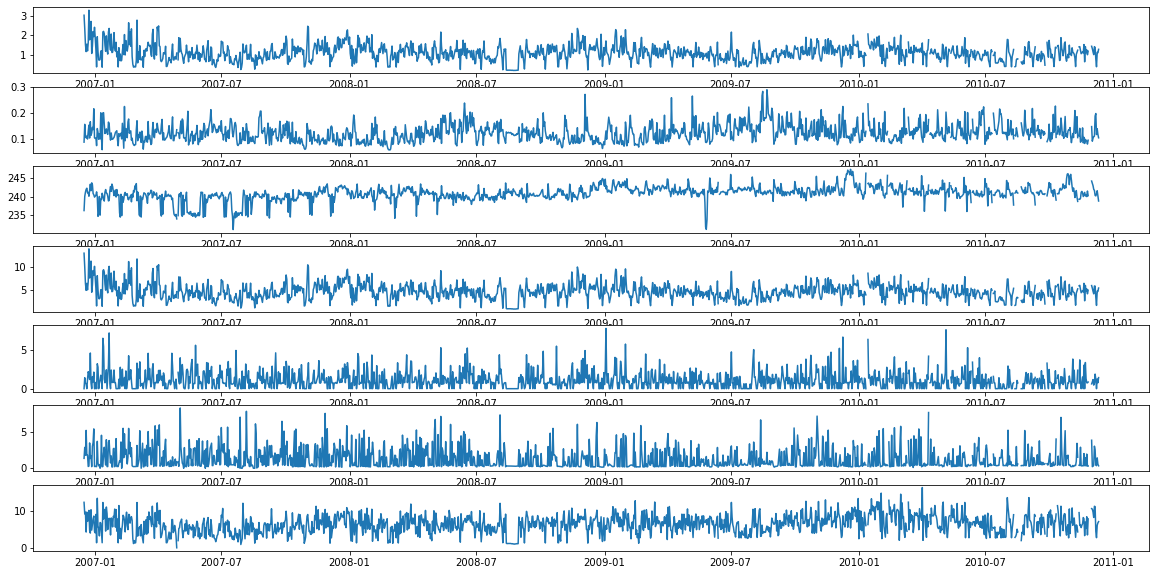

In [29]:
#Visualization plot for day resample

i = 1
cols=['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(new.resample('D').mean()[col])
    #plt.title(new.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

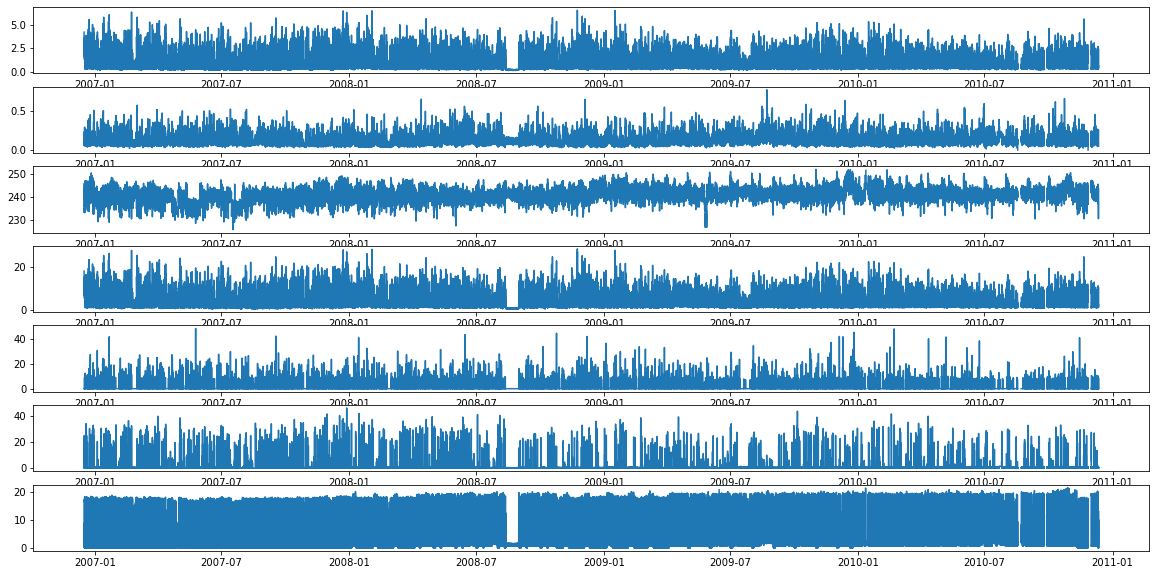

In [30]:
#Visualization based on hour resample

i = 1
cols=['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(new.resample('H').mean()[col])
    #plt.title(new.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

In [ ]:
'''I will consider the data as resampled data based on day. Notice that when data has been resampled we should deal with missing
values. I have used the interpolate method to fill missing values after resampleing data.'''

In [31]:

new_df=new.resample('D').mean()

In [ ]:
'''new_df presentes a new dataframe which is resampled dataframe through day.'''

In [32]:
new_df['Global_active_power'].isnull().sum()

24

In [ ]:
'''We can see that after resampling data, Global_active_power column has 16 missing data. To fill these missing data I have applied
interpolate method in the next step.'''

In [33]:
new_df['Global_active_power'].interpolate(method='linear', inplace=True)

In [34]:
new_df['Global_active_power'].isnull().sum()

0

In [ ]:
'''These steps can be done for other columns.'''

In [35]:
for col in cols:
    new_df[col].interpolate(method='linear', inplace=True) 

In [36]:
new_df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
'''In the next step we can implemet seasonal_decompose() function to get more vision about seasonality.'''

In [ ]:
#seasonality and decompose data

In [37]:
def seasonal_function(t):
    decomposition=sm.tsa.seasonal_decompose(t, model='multiplicative', extrapolate_trend='freq', period=365)
    fig = decomposition.plot()
    #fig.set_size_inches(14,7)
    plt.show()

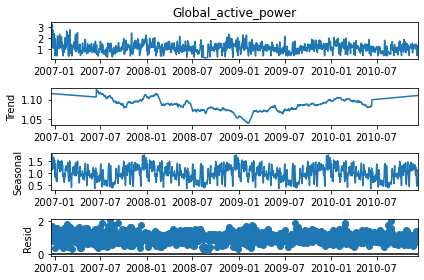

In [38]:
seasonal_function(new_df['Global_active_power'])

In [ ]:
'''By the same way we can see the seasonality for other columns in dataset.'''

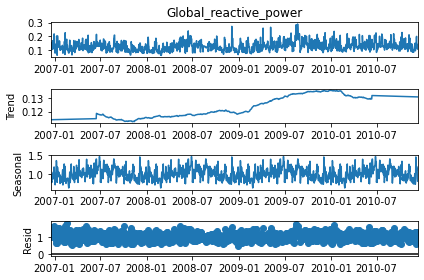

In [39]:
seasonal_function(new_df['Global_reactive_power'])

In [ ]:
'''This plot shows that Global_reactive_pwer includes the increasing trend.'''

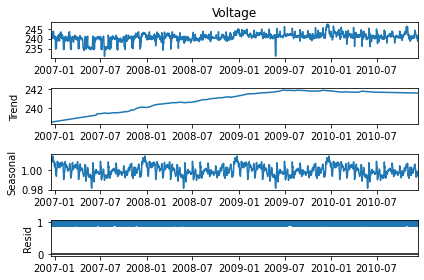

In [40]:
seasonal_function(new_df['Voltage'])

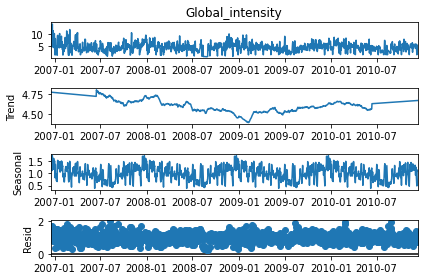

In [41]:
seasonal_function(new_df['Global_intensity'])

In [42]:
def seasonal_function_add(t):
    decomposition=sm.tsa.seasonal_decompose(t, model='additive', extrapolate_trend='freq', period=365)
    fig = decomposition.plot()
    #fig.set_size_inches(14,7)
    plt.show()

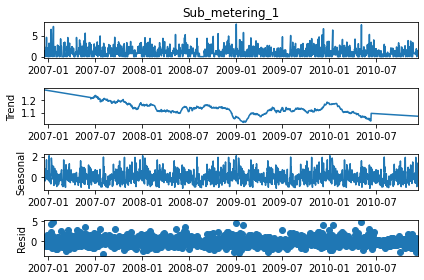

In [43]:

seasonal_function_add(new_df['Sub_metering_1'])

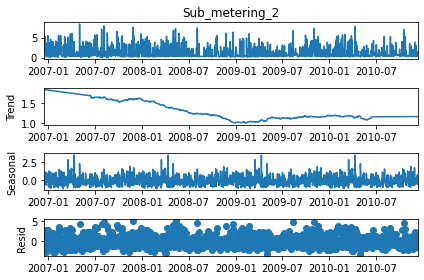

In [44]:
seasonal_function_add(new_df['Sub_metering_2'])

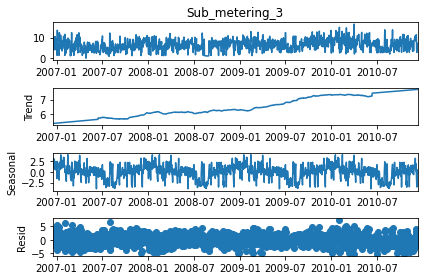

In [45]:
seasonal_function_add(new_df['Sub_metering_3'])

In [ ]:
'''most of models for multivatiate time series requires time series to be stationary, we will use one popular statistical test.
There are two common methods to test stationary. Visualization method and Df method'''

In [46]:
'''Now we can check by DF method. If the value of p-value is less than 0.05 then dataset is stationary and otherwise dataset
is not stationary.


I have defined df_test to check the p-value for each column in dataset.'''


def df_test(time_series,variables):
    for item in variables:
        result=adfuller(time_series[item])[1]
        if result<0.05:
            print(f" {item} : result = {result} => Stationary. ")
        else:
            print(f" {item} : result = {result} => Non-stationary.")

In [47]:
df_test(new_df,cols)

 Global_active_power : result = 2.810934450524064e-13 => Stationary. 
 Global_reactive_power : result = 7.24651695200982e-07 => Stationary. 
 Voltage : result = 2.142991999431342e-06 => Stationary. 
 Global_intensity : result = 1.8557153082169267e-13 => Stationary. 
 Sub_metering_1 : result = 0.0 => Stationary. 
 Sub_metering_2 : result = 2.6208993735859594e-23 => Stationary. 
 Sub_metering_3 : result = 5.704212039595956e-11 => Stationary. 


In [ ]:
'''The result of df_test shows that the data in columns are stationary data and we dont need to change data into stationary
format.'''

In [ ]:
#Causality Investigation

In [ ]:
'''Here, we use Granger Causality Test to investigate causality of data. Granger causality is a way to investigate the causality
between two variables in a time series which actually means if a particular variable comes before another in the time series.
In the MTS, we will test the causality of all combinations of pairs of variables'''

In [48]:
matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

matrix

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Global_reactive_power,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Voltage,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Global_intensity,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sub_metering_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sub_metering_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sub_metering_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
maxlag=12

for col in matrix.columns:
    for row in matrix.index:
        test_result = grangercausalitytests(new_df[[row, col]], maxlag=maxlag, verbose=False)            
        p_values = [round(test_result[i+1][0]['ssr_chi2test'][1],4) for i in range(maxlag)]            
        min_p_value = np.min(p_values)
        matrix.loc[row, col] = min_p_value
matrix.columns = [var + '_x' for var in cols]
matrix.index = [var + '_y' for var in cols]
print(matrix)

                         Global_active_power_x  Global_reactive_power_x  \
Global_active_power_y                      1.0                   0.0000   
Global_reactive_power_y                    0.0                   1.0000   
Voltage_y                                  0.0                   0.0086   
Global_intensity_y                         0.0                   0.0000   
Sub_metering_1_y                           0.0                   0.0003   
Sub_metering_2_y                           0.0                   0.0025   
Sub_metering_3_y                           0.0                   0.0000   

                         Voltage_x  Global_intensity_x  Sub_metering_1_x  \
Global_active_power_y       0.0000                 0.0            0.0000   
Global_reactive_power_y     0.0000                 0.0            0.0000   
Voltage_y                   1.0000                 0.0            0.0091   
Global_intensity_y          0.0000                 1.0            0.0001   
Sub_metering_1_y   

In [ ]:
'''From the results, each column represents a predictor x of each variable and each row represents the response y and the
p-value of each pair of variables are shown in the matrix. Take the value 0 in (row 1, column 4) as an example, it refers 
that Global_intensity_x  is causal to Global_active_power_y, But for some columns the p-value is bigger that 0.05 so we 
cant reject that the null hypothesis and this dataset is not a good candidate of VectorARIMA modeling.


I will use the deep learning(LSTM) for this dataset.'''

In [ ]:
#Forecasting by Deep Leaarning(Long Short term Memory)

'''The first step is to prepare the dataset for the LSTM.This involves framing the dataset as a supervised learning problem
and normalizing the input variables.

We can transform the dataset using the series_to_supervised() function.'''

In [50]:
# convert series to supervised learning

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [51]:

scaler = MinMaxScaler()
scaled=scaler.fit_transform(new_df.values)

In [52]:
#Frame as supervised learning

reframed = series_to_supervised(scaled, 1, 1)

In [53]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
1,0.916786,0.130732,0.315385,0.928499,0.000000,0.163965,0.754442,0.694252,0.426671,0.550494,0.695226,0.181749,0.345776,0.561892
2,0.694252,0.426671,0.550494,0.695226,0.181749,0.345776,0.561892,0.431901,0.234750,0.620518,0.424618,0.095031,0.216451,0.590406
3,0.431901,0.234750,0.620518,0.424618,0.095031,0.216451,0.590406,0.313037,0.202322,0.667476,0.311508,0.075006,0.627798,0.261003
4,0.313037,0.202322,0.667476,0.311508,0.075006,0.627798,0.261003,0.436748,0.232377,0.686364,0.428075,0.000000,0.218680,0.592301
5,0.436748,0.232377,0.686364,0.428075,0.000000,0.218680,0.592301,0.324715,0.182669,0.608825,0.319633,0.158009,0.216917,0.439519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,0.381196,0.563720,0.566815,0.381199,0.241993,0.302217,0.682106,0.189976,0.605716,0.558545,0.195835,0.154124,0.053349,0.271406
1453,0.189976,0.605716,0.558545,0.195835,0.154124,0.053349,0.271406,0.061772,0.256586,0.593799,0.061682,0.000000,0.042448,0.167713
1454,0.061772,0.256586,0.593799,0.061682,0.000000,0.042448,0.167713,0.301076,0.353003,0.644255,0.298596,0.161366,0.171773,0.374468
1455,0.301076,0.353003,0.644255,0.298596,0.161366,0.171773,0.374468,0.293913,0.260083,0.561116,0.292976,0.098697,0.064415,0.413259


In [54]:
# drop columns we don't want to predict

reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.916786   0.130732   0.315385   0.928499   0.000000   0.163965   
2   0.694252   0.426671   0.550494   0.695226   0.181749   0.345776   
3   0.431901   0.234750   0.620518   0.424618   0.095031   0.216451   
4   0.313037   0.202322   0.667476   0.311508   0.075006   0.627798   
5   0.436748   0.232377   0.686364   0.428075   0.000000   0.218680   

   var7(t-1)   var1(t)  
1   0.754442  0.694252  
2   0.561892  0.431901  
3   0.590406  0.313037  
4   0.261003  0.436748  
5   0.592301  0.324715  


In [ ]:
#Define and Fit Model

'''First, we must split the prepared dataset into train and test sets. '''

In [55]:
values = reframed.values

In [56]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
1,0.916786,0.130732,0.315385,0.928499,0.000000,0.163965,0.754442,0.694252
2,0.694252,0.426671,0.550494,0.695226,0.181749,0.345776,0.561892,0.431901
3,0.431901,0.234750,0.620518,0.424618,0.095031,0.216451,0.590406,0.313037
4,0.313037,0.202322,0.667476,0.311508,0.075006,0.627798,0.261003,0.436748
5,0.436748,0.232377,0.686364,0.428075,0.000000,0.218680,0.592301,0.324715
...,...,...,...,...,...,...,...,...
1452,0.381196,0.563720,0.566815,0.381199,0.241993,0.302217,0.682106,0.189976
1453,0.189976,0.605716,0.558545,0.195835,0.154124,0.053349,0.271406,0.061772
1454,0.061772,0.256586,0.593799,0.061682,0.000000,0.042448,0.167713,0.301076
1455,0.301076,0.353003,0.644255,0.298596,0.161366,0.171773,0.374468,0.293913


In [73]:
train=values[:1200, :]
test = values[1200:, :]

In [74]:
# split into input and outputs
test_X, test_y = test[:, :-1], test[:, -1]
train_X, train_y = train[:, :-1], train[:, -1]

In [75]:
train.shape, test.shape

((1200, 8), (256, 8))

In [76]:
# reshape input to be 3D [samples, timesteps, features]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1200, 1, 7) (1200,) (256, 1, 7) (256,)


In [ ]:
'''I will define the LSTM with 50 neurons in the first hidden layer and 1 neuron in the output layer for prediction.
I will use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.'''

Epoch 1/50
17/17 - 4s - loss: 0.2460 - val_loss: 0.1434 - 4s/epoch - 248ms/step
Epoch 2/50
17/17 - 0s - loss: 0.1273 - val_loss: 0.0787 - 113ms/epoch - 7ms/step
Epoch 3/50
17/17 - 0s - loss: 0.1017 - val_loss: 0.0869 - 114ms/epoch - 7ms/step
Epoch 4/50
17/17 - 0s - loss: 0.0987 - val_loss: 0.0772 - 103ms/epoch - 6ms/step
Epoch 5/50
17/17 - 0s - loss: 0.0967 - val_loss: 0.0761 - 84ms/epoch - 5ms/step
Epoch 6/50
17/17 - 0s - loss: 0.0954 - val_loss: 0.0762 - 112ms/epoch - 7ms/step
Epoch 7/50
17/17 - 0s - loss: 0.0942 - val_loss: 0.0758 - 112ms/epoch - 7ms/step
Epoch 8/50
17/17 - 0s - loss: 0.0931 - val_loss: 0.0750 - 113ms/epoch - 7ms/step
Epoch 9/50
17/17 - 0s - loss: 0.0922 - val_loss: 0.0743 - 121ms/epoch - 7ms/step
Epoch 10/50
17/17 - 0s - loss: 0.0914 - val_loss: 0.0738 - 132ms/epoch - 8ms/step
Epoch 11/50
17/17 - 0s - loss: 0.0906 - val_loss: 0.0732 - 78ms/epoch - 5ms/step
Epoch 12/50
17/17 - 0s - loss: 0.0901 - val_loss: 0.0730 - 115ms/epoch - 7ms/step
Epoch 13/50
17/17 - 0s - los

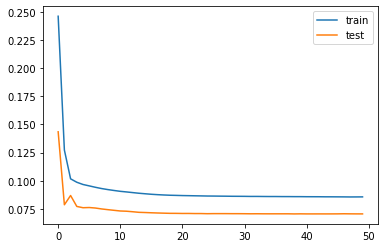

In [77]:
#Building the network

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
#Evaluate Model
'''Now we can forecast the test data using the model and the evaluate the forecated data using RMSE.'''

In [78]:
# make a prediction
yhat = model.predict(test_X)


In [79]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [80]:
# invert scaling for actual

test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [86]:
test_y.shape, test_X[:, -7:].shape

((256, 1), (256, 7))

In [81]:
# invert scaling for forecast

inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [84]:
# calculate RMSE

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.276
